#  Support Vector Regression (SVR)

---

##  What is SVR?

SVR helps a computer **guess a number** (like price, temperature, etc.) from input.
It draws a **line (or curve)** that stays **close to the real answers** and **ignores small mistakes**.

---

## Example Data

| x (input) | y (real answer) |
| --------: | --------------: |
|         1 |               2 |
|         2 |               3 |
|         3 |             2.5 |

We want the computer to learn how to guess `y` from `x`.

---

## Step-by-Step

---

###  Step 1: Use a Line to Guess

SVR uses this formula:

$$
y = wx + b
$$

Let's say the model finds:

* $w = 0.5$, $b = 1.2$

Then it makes these guesses:

| x | Formula: $0.5x + 1.2$ | Predicted y |
| - | --------------------- | ----------- |
| 1 | 0.5 × 1 + 1.2         | 1.7         |
| 2 | 0.5 × 2 + 1.2         | 2.2         |
| 3 | 0.5 × 3 + 1.2         | 2.7         |

---

###  Step 2: Compare Guess with Real Value

```
Real Values:     ●(2.0)    ●(3.0)   ●(2.5)
                /          |        \
Predicted:    (1.7)      (2.2)     (2.7)
Errors:        0.3        0.8       0.2
```
---

###  Step 3: Set SVR Rules

* **ε (epsilon) = 0.2** → Small errors (≤ 0.2) are allowed
* **C = 1** → Tells the model how much to care about big errors

---

###  Step 4: Apply ε-insensitive Loss

We ignore small errors and only punish errors **greater than ε**:

$$
\text{Loss} = 
\begin{cases}
0 & \text{if error} \leq ε \\
C \times (\text{error} - ε) & \text{if error} > ε
\end{cases}
$$

Let's calculate for each point:

**For x = 1:**
- Error = 0.3
- Since 0.3 > 0.2, Loss = 1 × (0.3 - 0.2) = 1 × 0.1 = **0.1**

**For x = 2:**
- Error = 0.8  
- Since 0.8 > 0.2, Loss = 1 × (0.8 - 0.2) = 1 × 0.6 = **0.6**

**For x = 3:**
- Error = 0.2
- Since 0.2 ≤ 0.2, Loss = **0**

| x | Error | Is Error > ε? | Loss Calculation     | Final Loss |
| - | ----- | ------------- | -------------------- | ---------- |
| 1 | 0.3   | Yes           | 1 × (0.3 - 0.2) = 0.1 | 0.1        |
| 2 | 0.8   | Yes           | 1 × (0.8 - 0.2) = 0.6 | 0.6        |
| 3 | 0.2   | No            | 0                    | 0          |

**Total Error Loss = 0.1 + 0.6 + 0 = 0.7**

---

###  Step 5: Add Simplicity Rule (Regularization)

We want the model to be **simple** — not too sharp or complicated.
So we add a **regularization penalty**:

$$
\text{Regularization} = \frac{1}{2}w^2 = \frac{1}{2}(0.5)^2 = \frac{1}{2} \times 0.25 = 0.125
$$

---

###  Step 6: Final Total Loss

$$
\text{Total Loss} = \text{Total Error Loss} + \text{Regularization}
$$

$$
\text{Total Loss} = 0.7 + 0.125 = \boxed{0.825}
$$

---

##  Why Do We Use `C`?

| Value of C        | Meaning                                 |
| ----------------- | --------------------------------------- |
| Small (e.g., 0.1) | "Mistakes are okay" (relaxed model)     |
| Large (e.g., 100) | "Mistakes are bad!" (very strict model) |

→ `C` controls **how strict** the model is when errors go beyond ε.

---

##  Let's Try Another Example with Different Parameters

### Same data, but:
- **w = 0.6**, **b = 1.0**
- **ε = 0.1**
- **C = 2**

### Step 1: New Predictions

| x | Formula: $0.6x + 1.0$ | Predicted y |
| - | --------------------- | ----------- |
| 1 | 0.6 × 1 + 1.0         | 1.6         |
| 2 | 0.6 × 2 + 1.0         | 2.2         |
| 3 | 0.6 × 3 + 1.0         | 2.8         |

### Step 2: Calculate Errors

| x | Real y | Predicted y | Error |
| - | ------ | ----------- | ----- |
| 1 | 2.0    | 1.6         | 0.4   |
| 2 | 3.0    | 2.2         | 0.8   |
| 3 | 2.5    | 2.8         | 0.3   |

### Step 3: Apply Loss with ε = 0.1, C = 2

**For x = 1:**
- Error = 0.4 > 0.1
- Loss = 2 × (0.4 - 0.1) = 2 × 0.3 = **0.6**

**For x = 2:**
- Error = 0.8 > 0.1  
- Loss = 2 × (0.8 - 0.1) = 2 × 0.7 = **1.4**

**For x = 3:**
- Error = 0.3 > 0.1
- Loss = 2 × (0.3 - 0.1) = 2 × 0.2 = **0.4**

**Total Error Loss = 0.6 + 1.4 + 0.4 = 2.4**

### Step 4: Regularization

$$
\text{Regularization} = \frac{1}{2}w^2 = \frac{1}{2}(0.6)^2 = \frac{1}{2} \times 0.36 = 0.18
$$

### Step 5: Final Total Loss

$$
\text{Total Loss} = 2.4 + 0.18 = \boxed{2.58}
$$

---

## Final Summary Table

| Term              | Meaning                                             |
| ----------------- | --------------------------------------------------- |
| SVR               | A model to guess numbers using a line               |
| ε (epsilon)       | The "no-penalty zone" — small errors are ignored    |
| C                 | Controls how strict the model is about errors       |
| Loss              | Penalty for being wrong beyond ε                    |
| Regularization    | Helps keep the model simple                         |

**Remember:** Lower total loss = better model!

In [1]:
import numpy as np

In [2]:
# Step 1: Data
x = np.array([1, 2, 3])
y = np.array([2.0, 3.0, 2.5])

In [3]:
# Step 2: Model parameters (guessed or pre-trained)
w = 0.5
b = 1.2

In [4]:
# Step 3: SVR settings
epsilon = 0.2
C = 1


In [5]:
# Step 4: Predict y using the line y = w*x + b
y_pred = w * x + b

In [6]:
# Step 5: Compute absolute errors
errors = np.abs(y - y_pred)

In [7]:
# Step 6: Apply epsilon-insensitive loss
losses = []
for err in errors:
    if err <= epsilon:
        losses.append(0)
    else:
        losses.append(C * (err - epsilon))

In [8]:
# Step 7: Regularization term (keep w small)
regularization = 0.5 * (w ** 2)

In [9]:
regularization

0.125

In [10]:
# Step 8: Total loss
total_loss = sum(losses) + regularization

In [11]:
total_loss

np.float64(0.8250000000000002)

In [12]:
import matplotlib.pyplot as plt

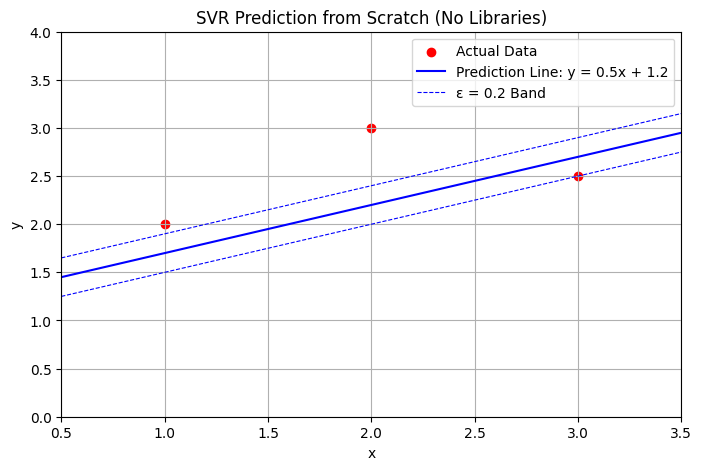

In [13]:
#Plot
x_line = np.linspace(0.5, 3.5, 100)
y_line = w * x_line + b

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='red', label='Actual Data')
plt.plot(x_line, y_line, color='blue', label='Prediction Line: y = 0.5x + 1.2')

# Optional: Plot epsilon bands
plt.plot(x_line, y_line + epsilon, color='blue', linestyle='--', linewidth=0.8, label='ε = 0.2 Band')
plt.plot(x_line, y_line - epsilon, color='blue', linestyle='--', linewidth=0.8)

plt.title("SVR Prediction from Scratch (No Libraries)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.ylim(0, 4)
plt.xlim(0.5, 3.5)
plt.show()

# The Kernel Trick in Support Vector Regression (SVR)

---

##  What is the Kernel Trick?

In traditional SVR, we try to find a **straight line** (or hyperplane) that best fits the data:

$$
y = wx + b
$$

However, this only works well when the relationship between `x` and `y` is **linear** (straight).
But what if the data looks like a **curve**?

> The **Kernel Trick** allows us to fit a curved model **without explicitly transforming the data into higher dimensions.**

---

## Why Do We Need It?

Let's consider this dataset:

| x | y |
| - | - |
| 1 | 1 |
| 2 | 4 |
| 3 | 9 |

This follows a quadratic curve: $y = x^2$.
A straight line **cannot** fit this properly.
Instead of transforming `x` into `x²` manually, the **kernel trick** allows SVR to **work as if it did**, without extra computation.

---

##  How It Works (Simple Terms)

The kernel trick uses a **kernel function** to measure the **similarity** between two input points:

$$
K(x_i, x_j)
$$

Instead of using the actual inputs, SVR uses these similarity scores to fit the model.

---

##  Common Kernel Functions

| Kernel Type    | Purpose                      | Formula                               |
| -------------- | ---------------------------- | ------------------------------------- |
| Linear         | Fits straight-line data      | $K(x_i, x_j) = x_i \cdot x_j$         |
| Polynomial     | Fits curved data like x², x³ | $K(x_i, x_j) = (x_i \cdot x_j + c)^d$ |
| RBF (Gaussian) | Fits very flexible curves    | $K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$ |

---

###  Example: RBF Kernel

Let's apply an RBF kernel manually between two points:

$$
K(1, 3) = \exp(-\gamma (1 - 3)^2)
$$

If we set $\gamma = 0.5$:

$$
K(1, 3) = \exp(-0.5 \cdot 4) = \exp(-2) \approx 0.135
$$

→ This value tells us that **points 1 and 3 are not very similar**.

---

##  Parameter γ (gamma)

* **High γ** → Every point influences only its close neighbors → sharper, more complex curve
* **Low γ** → Every point influences a wider region → smoother, simpler curve

---

##  Why Is This Useful?

* The kernel trick allows SVR to model **non-linear relationships**.
* It makes SVR powerful for many types of data — **without explicitly creating new features** like $x^2, x^3$, etc.

---

##  Final Summary Table

| Concept      | Meaning                                                                      |
| ------------ | ---------------------------------------------------------------------------- |
| Kernel Trick | Helps SVR handle non-linear data by comparing similarity instead of position |
| Kernel       | A function that returns similarity between input points                      |
| RBF Kernel   | A popular kernel that creates smooth, flexible curves                        |
| γ (gamma)    | Controls how sharp or smooth the curve is                                    |


###  Real-Life SVR Use Cases for Kernels

| Problem                        | Why Kernel Needed                       | Example Kernel   |
| ------------------------------ | --------------------------------------- | ---------------- |
| Predict stock price trends     | Price doesn’t follow a straight pattern | RBF              |
| Forecast traffic volume        | Traffic increases/decreases in waves    | RBF / Polynomial |
| Predict electricity usage      | Usage rises in the day, falls at night  | RBF              |
| Model robot arm motion         | Positioning is nonlinear                | Polynomial       |
| Medical dose-response modeling | Effect vs. dose is often a curve        | Polynomial       |





In [14]:
# define RBF kernel function
def rbf_kernel(x1, x2, gamma=0.5):
    return np.exp(-gamma * (x1 - x2)**2)

In [15]:
# Compute kernel matrix
def compute_kernel_matrix(X, gamma=0.5):
    n = len(X)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i][j] = rbf_kernel(X[i], X[j], gamma)
    return K

In [16]:
# compute similarity (kernel matrix)
K = compute_kernel_matrix(x)

In [17]:
K

array([[1.        , 0.60653066, 0.13533528],
       [0.60653066, 1.        , 0.60653066],
       [0.13533528, 0.60653066, 1.        ]])

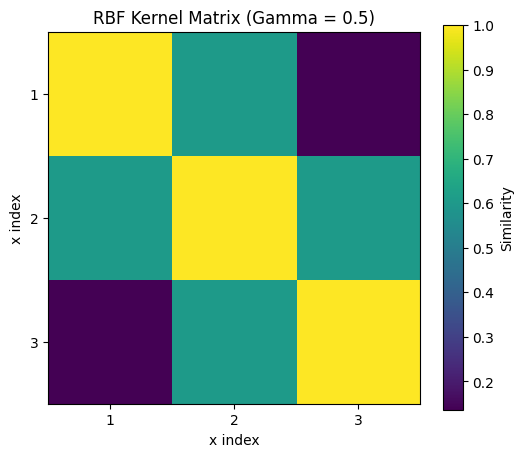

In [18]:
# Plot kernel matrix as a heatmap
plt.figure(figsize=(6, 5))
plt.imshow(K, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Similarity')
plt.title('RBF Kernel Matrix (Gamma = 0.5)')
plt.xlabel('x index')
plt.ylabel('x index')
plt.xticks(np.arange(len(x)), x)
plt.yticks(np.arange(len(x)), x)
plt.grid(False)
plt.show()

# Value Prediction

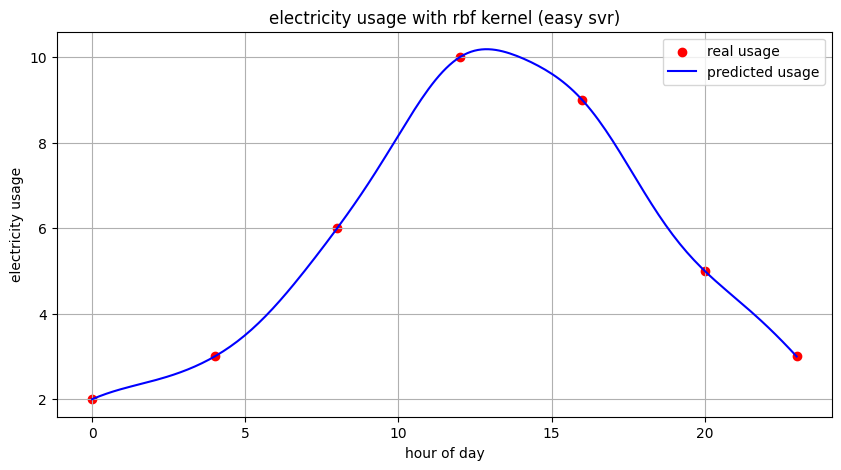

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# step 1: electricity usage during the day (hour vs usage)
x = np.array([0, 4, 8, 12, 16, 20, 23])    # hour of the day
y = np.array([2, 3, 6, 10, 9, 5, 3])       # usage pattern

# step 2: rbf kernel function (measures similarity)
def rbf(x1, x2, gamma=0.1):
    return np.exp(-gamma * (x1 - x2)**2)

# step 3: create kernel matrix (training vs training)
def kernel_matrix(X1, X2, gamma=0.1):
    n1, n2 = len(X1), len(X2)
    K = np.zeros((n1, n2))
    for i in range(n1):
        for j in range(n2):
            K[i][j] = rbf(X1[i], X2[j], gamma)
    return K

# step 4: compute weights (alpha)
K_train = kernel_matrix(x, x)
alpha = np.linalg.pinv(K_train) @ y  # simple solution

# step 5: predict for each hour in the day
x_test = np.linspace(0, 23, 200)             # hours from 0 to 23
K_test = kernel_matrix(x_test, x)            # compare test with training
y_pred = K_test @ alpha                      # predicted usage

# step 6: plot
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='red', label='real usage')
plt.plot(x_test, y_pred, color='blue', label='predicted usage')
plt.title('electricity usage with rbf kernel (easy svr)')
plt.xlabel('hour of day')
plt.ylabel('electricity usage')
plt.grid(True)
plt.legend()
plt.show()


# SVR with RBF Kernel Using scikit-learn

Predicted usage at hour 30: 5.325190254781161


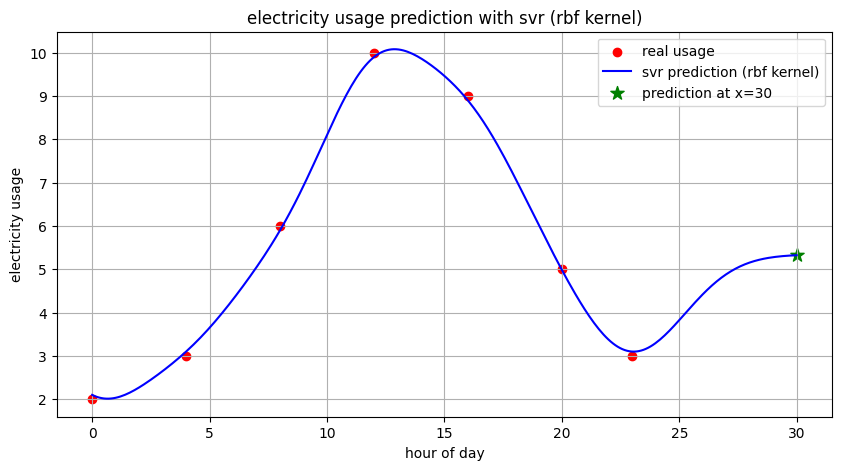

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# step 1: electricity usage data
x = np.array([0, 4, 8, 12, 16, 20, 23])
y = np.array([2, 3, 6, 10, 9, 5, 3])

# step 2: reshape for sklearn
X = x.reshape(-1, 1)

# step 3: train svr model with rbf kernel
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X, y)

# step 4: predict for each hour in the day
x_test = np.linspace(0, 30, 300).reshape(-1, 1)
y_pred = model.predict(x_test)

# step 5: predict for x = 30
x_30 = np.array([[30]])
y_30 = model.predict(x_30)[0]
print("Predicted usage at hour 30:", y_30)

# step 6: plot
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='red', label='real usage')
plt.plot(x_test, y_pred, color='blue', label='svr prediction (rbf kernel)')
plt.scatter([30], [y_30], color='green', s=100, marker='*', label='prediction at x=30')
plt.title('electricity usage prediction with svr (rbf kernel)')
plt.xlabel('hour of day')
plt.ylabel('electricity usage')
plt.grid(True)
plt.legend()
plt.show()